
# Bhagavad Gita

### Introduction
Bhagavad-gītā is the most important chapter of Mahābhārata, the great Sanskrit epic of ancient India, one of the books of vedic literature and one of the most significant literary works of human history. Bhagavad-gītā contains a discussion between God, Lord Kṛṣṇa and Arjuna, in which Kṛṣṇa teaches Arjuna about the most important questions of human life.

In this project, I will perform an exploratory analysis on data provided by [Kaggle](https://www.kaggle.com/taruntiwarihp/bhagavad-gita). I will plot some visualization so that it will be easy on the eyes.

In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [3]:
%matplotlib inline

In [4]:
# Read the csv file into DataFrame
df = pd.read_csv('bhagavad-gita.csv')

In [5]:
# Drop the first cloumn
df.drop(df.columns[[0]], axis=1, inplace=True)

In [6]:
# Check first 5 rows of the DataFrame
df.head()

,title,devanagari,verse_text,verse_text_no_samdhis
0,1.1,धृतराष्ट्र उवाच ।\nधर्मक्षेत्रे कुरुक्षेत्रे स...,dhṛtarāṣṭra uvāca\ndharma-kṣetre kuru-kṣetre\n...,dhṛtarāṣṭraḥ uvāca dharma kṣetre kuru kṣetre s...
1,1.2,सञ्जय उवाच ।\nदृष्ट्वा तु पाण्डवानीकं व्यूढं द...,sañjaya uvāca\ndṛṣṭvā tu pāṇḍavānīkaṁ\nvyūḍhaṁ...,sañjayaḥ uvāca dṛṣṭvā tu pāṇḍava anīkam vyūḍha...
2,1.3,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।\n...,paśyaitāṁ pāṇḍu-putrānām\nācārya mahatīṁ camūm...,paśya etām pāṇḍu putrānām ācārya mahatīm camūm...
3,1.4,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि ।\nयुयुध...,atra śūrā maheṣv-āsā\nbhīmārjuna-samā yudhi\ny...,atra śūrāḥ mahā iṣu āsāḥ bhīma arjuna samāḥ yu...
4,1.5,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् ।\nपु...,dhṛṣṭaketuś cekitānaḥ\nkāśirājaś ca vīryavān\n...,dhṛṣṭaketuḥ cekitānaḥ kāśirājaḥ ca vīrya vān p...


In [7]:
# Checking the data type of every column.
df.dtypes

title                    float64
devanagari                object
verse_text                object
verse_text_no_samdhis     object
dtype: object

### Exploratory Data Analysis
Let's compute some basic counts like:
* Number of chapters
* Number of verses in each chapter
* and total number of verses

In [8]:
# Describe the DataFrame to get some stats.
df.describe()

,title
count,700.000000
mean,9.359071
std,5.593784
min,1.100000
25%,4.217500
50%,9.205000
75%,14.102500
max,18.900000


In [9]:
# Finding common pattern.

# Storing the title numbers to count the number
# of verses in a chapter
title_no = df['title'].astype(int)
list_counts = title_no.value_counts()

In `list_counts` *chapter* number are the index and the number of *verses* are the values of the Series.

In [10]:
# Checking the type of the list_count variable
type(list_counts)

pandas.core.series.Series

In [11]:
# To find the total number of verses
list_counts.sum()

700

In [12]:
# Describing the Series to look at some stats
list_counts.describe()

count    18.000000
mean     38.888889
std      16.391852
min      20.000000
25%      28.000000
50%      34.500000
75%      45.250000
max      78.000000
Name: title, dtype: float64

###### In Bhagavad Gita (from above anlaysis):
* It has a total of **18** chapters.
* On an average there are **38** verses in a chapter.
* There are a total of **700** verses in it.
* Least number of verses are **20** in a any chapter.
* Maximun number of verses are **78** in a chapter.

## Visualizing common patterns.

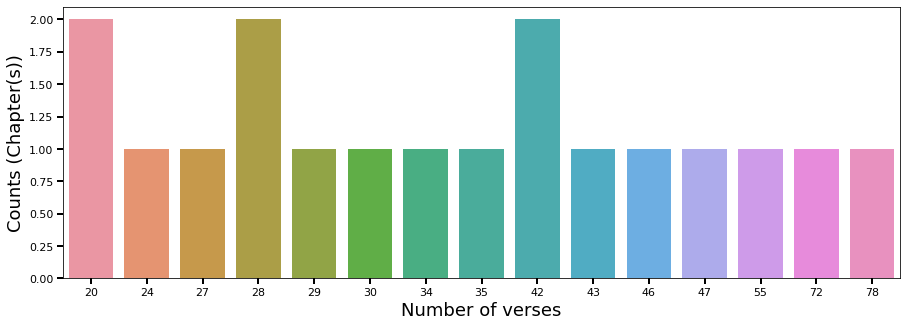

In [13]:
# Setting the dimensions of the figure
plt.figure(figsize=(15,5), frameon=False)
plt.tick_params(labelsize=11, length=6, width=2)

# Passing the data to plot
sns.countplot(list_counts)
plt.xlabel("Number of verses", fontsize=18)
plt.ylabel("Counts (Chapter(s))", fontsize=18)

# Displaying the plot
plt.show()

Tere are two chapters with 20 number of verses in them, another two chapters have 28 number of verses and two more chapters which has 42 numbers of verses in it. Rest of the chapters have distinct number of verses in them.

## Number of verses in various chapters

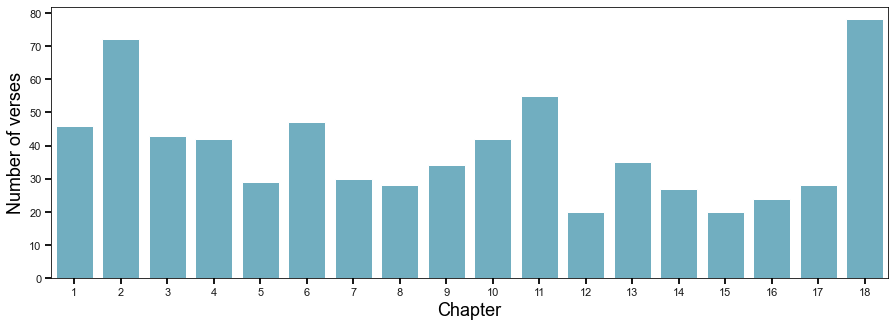

In [14]:
# Setting plot dimenstions
plt.figure(figsize=(15,5), frameon=False)
plt.tick_params(labelsize=11, colors='k', length=6, width=2)

sns.set(style="darkgrid")

# Passing the data to plot
sns.countplot(title_no, color='c')
plt.xlabel("Chapter", fontsize=18)
plt.ylabel("Number of verses", fontsize=18)

# Displaying the plot
plt.show()

Highest number of verses are in the last chapter, i.e chapter 18. And the lowest number of verses are in chapter 12. 

## Grouping words

With word cloud we will have a look at the most used words in Gita.

In [15]:
stopwords = set(STOPWORDS)

In [16]:
# Collecting the words for wordcloud
data = df['verse_text']

In [17]:
# Inspecting the collected words
data.head()

0    dhṛtarāṣṭra uvāca\ndharma-kṣetre kuru-kṣetre\n...
1    sañjaya uvāca\ndṛṣṭvā tu pāṇḍavānīkaṁ\nvyūḍhaṁ...
2    paśyaitāṁ pāṇḍu-putrānām\nācārya mahatīṁ camūm...
3    atra śūrā maheṣv-āsā\nbhīmārjuna-samā yudhi\ny...
4    dhṛṣṭaketuś cekitānaḥ\nkāśirājaś ca vīryavān\n...
Name: verse_text, dtype: object

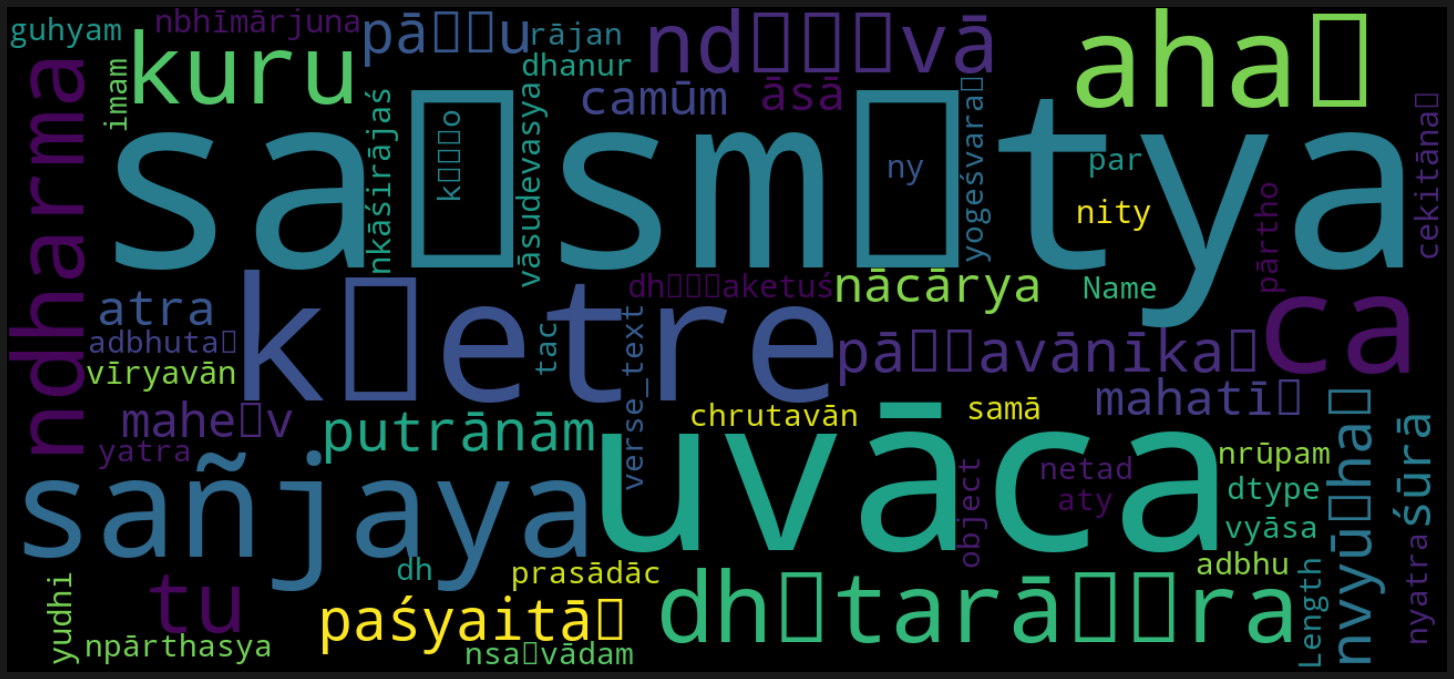

In [18]:
fig = plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(width=1300, height=600, stopwords=stopwords).generate(str(data))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

With the above visusalization we can see some of the most used words in Gita; the text size of the word gives an idea about the number of times the word has been used.